In [ ]:
!pip install mtcnn

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image_path = '/content/sample_data/gws.jpg'  # Change to the correct path if necessary
image = cv2.imread(image_path)

Wajah yang terdeteksi: 4


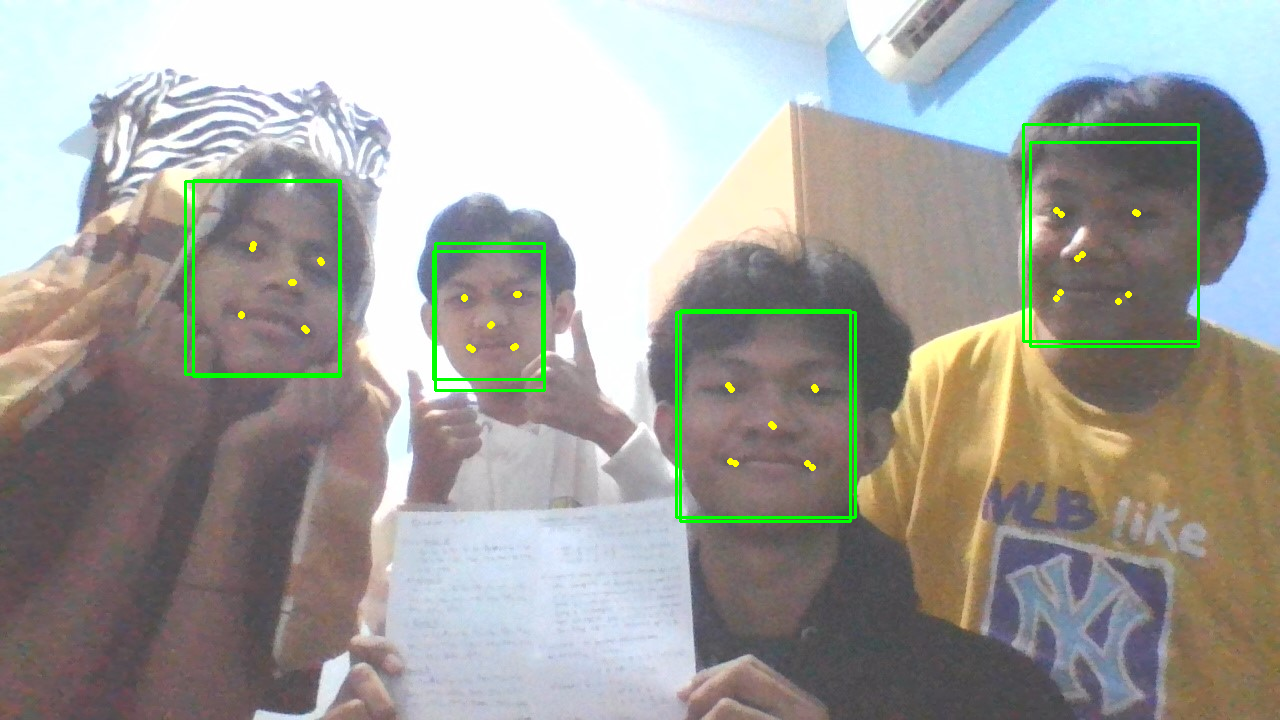

In [ ]:
# Check if the image was loaded properly
if image is None:
    print("Error: Gambar tidak ditemukan atau tidak dapat dimuat.")
else:
    # Convert image to RGB (MTCNN works better with RGB format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the MTCNN detector
    detector = MTCNN()

    # Detect faces in the image
    faces = detector.detect_faces(image_rgb)

    # Check if faces are detected
    if len(faces) == 0:
        print("Tidak ada wajah yang terdeteksi.")
    else:
        print(f"Wajah yang terdeteksi: {len(faces)}")

    # Draw bounding boxes and keypoints on detected faces
    for face in faces:
        bounding_box = face['box']
        keypoints = face['keypoints']

        cv2.rectangle(
            image,
            (bounding_box[0], bounding_box[1]),
            (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
            (0, 255, 0),
            2
        )

        cv2.circle(image, keypoints['left_eye'], 2, (0, 255, 255), 2)
        cv2.circle(image, keypoints['right_eye'], 2, (0, 255, 255), 2)
        cv2.circle(image, keypoints['nose'], 2, (0, 255, 255), 2)
        cv2.circle(image, keypoints['mouth_left'], 2, (0, 255, 255), 2)
        cv2.circle(image, keypoints['mouth_right'], 2, (0, 255, 255), 2)

    cv2_imshow(image)
